In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Beirut

In [8]:
beirut = pd.read_csv('beirut_rooftop_solarpotential.csv')

In [9]:
beirut.head(3)

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment
0,569d6f63-d2e7-456f-be4b-da27895e9eca,Beirut,354.39,59.22,11.49,14168.68,multi-family residential,19.79,33.70,1233.23,NaN,NaN
1,3bce2a65-655a-4da8-ac47-23cb29ce7255,Beirut,22.93,8.84,1.71,2232.89,multi-family residential,7.73,0.18,1304.00,NaN,NaN
2,84952e5a-85be-42c1-8d22-626f4515e396,Beirut,53.63,2.67,0.52,517.26,multi-family residential,24.54,19.88,997.00,NaN,NaN


In [10]:
beirut.columns

Index(['uuid', 'City', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor', 'Unit_installation_price', 'Comment'],
      dtype='object')

As uuid and comment is not make sensor our taget, they will be removed

In [11]:
beirut.drop(columns=['uuid','Comment'],axis = 1,inplace=True)

In [12]:
beirut.columns

Index(['City', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor', 'Unit_installation_price'],
      dtype='object')

common_columns = [
    "City",
    "Surface_area",
    "Potential_installable_area",
    "Peak_installable_capacity",
    "Energy_potential_per_year",
    "Assumed_building_type",
    "Estimated_tilt",
    "Estimated_building_height",
    "Estimated_capacity_factor"
]

Consider Common Columns

In [13]:
beirut = beirut[['City','Surface_area','Potential_installable_area','Peak_installable_capacity','Energy_potential_per_year','Assumed_building_type','Estimated_tilt','Estimated_building_height','Estimated_capacity_factor']]

In [14]:
beirut.head(1)

,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,Beirut,354.39,59.22,11.49,14168.68,multi-family residential,19.79,33.7,1233.23


In [15]:
beirut['City'].value_counts()

City
Beirut    69859
Name: count, dtype: int64

As name is same for column 'City', it will be dropped

In [16]:
beirut.drop(columns='City',axis=1,inplace=True)

In [17]:
beirut.head(1)

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,354.39,59.22,11.49,14168.68,multi-family residential,19.79,33.7,1233.23


In [18]:
beirut.shape

(69859, 8)

In [19]:
beirut.dtypes

Surface_area                  float64
Potential_installable_area    float64
Peak_installable_capacity     float64
Energy_potential_per_year     float64
Assumed_building_type          object
Estimated_tilt                float64
Estimated_building_height     float64
Estimated_capacity_factor     float64
dtype: object

In [20]:
num_col = beirut.select_dtypes(include=['int64', 'float64'])

cat_col = beirut.select_dtypes(exclude=['int64', 'float64'])

num_col.columns, cat_col.columns

(Index(['Surface_area', 'Potential_installable_area',
        'Peak_installable_capacity', 'Energy_potential_per_year',
        'Estimated_tilt', 'Estimated_building_height',
        'Estimated_capacity_factor'],
       dtype='object'),
 Index(['Assumed_building_type'], dtype='object'))

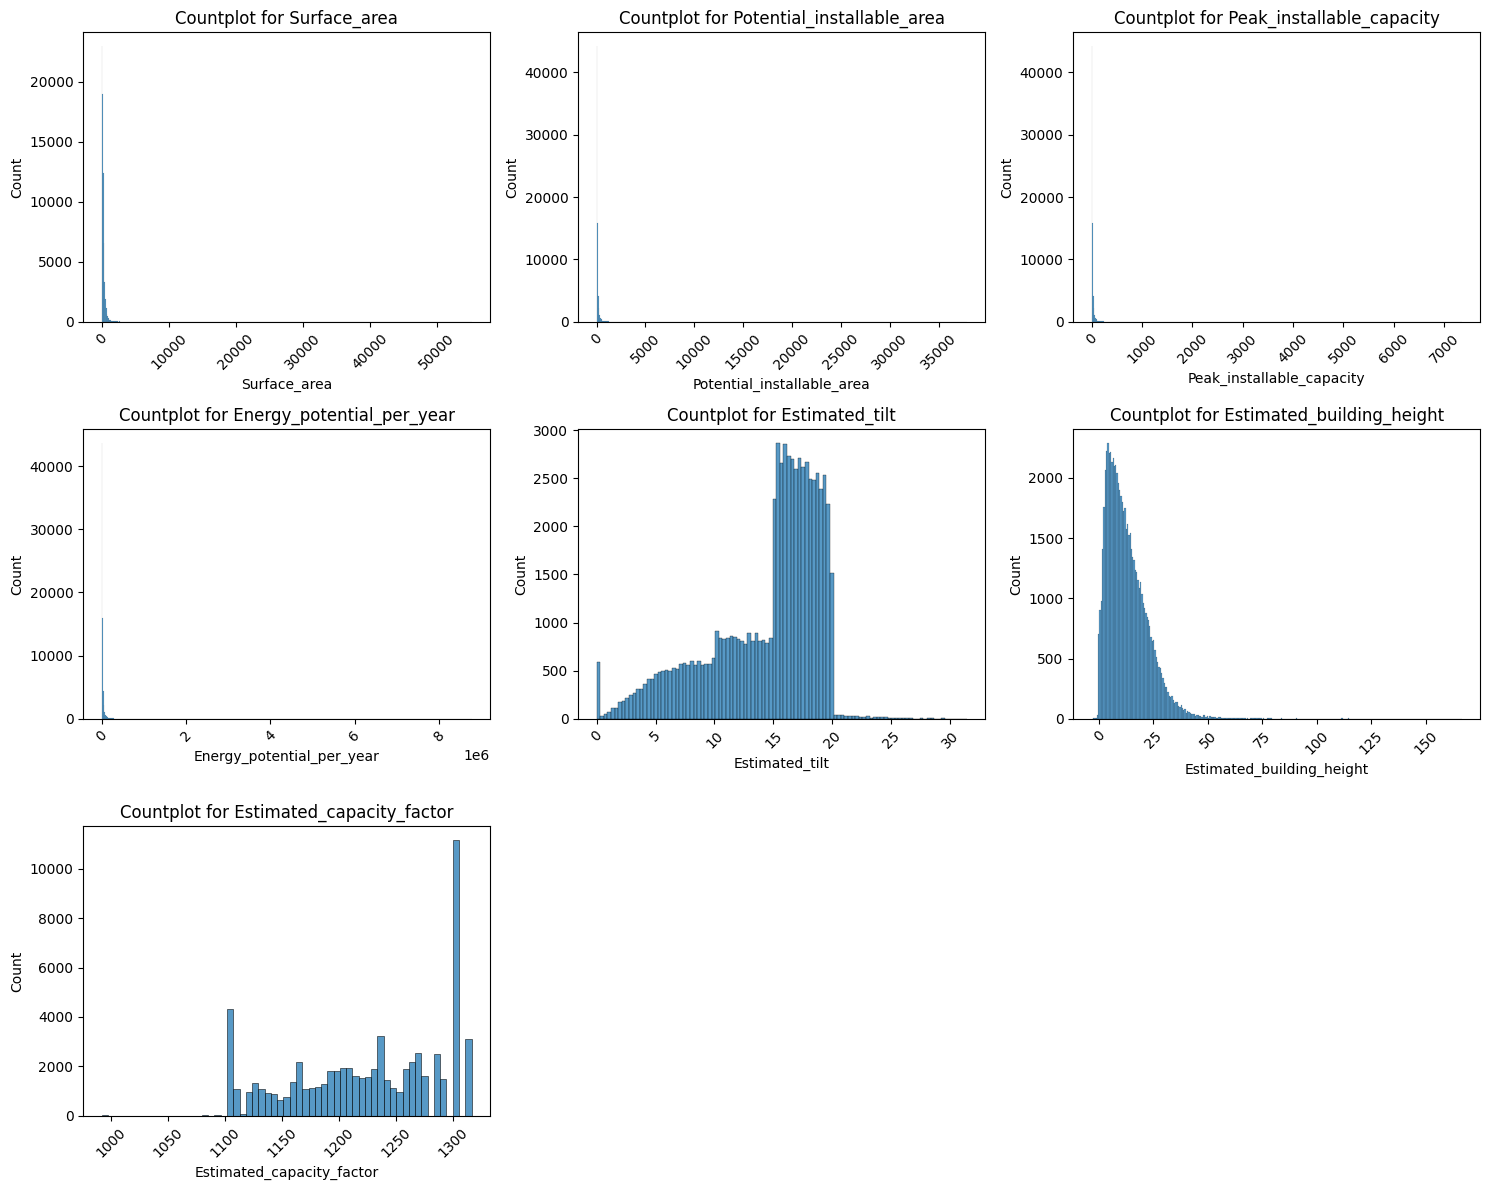

In [21]:
# Number of categorical columns
num_cols = len(num_col.columns)

# Set up the subplot grid dimensions
rows = (num_cols + 2) // 3  # Adjust the number of rows based on the number of columns
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Customize the size as needed
axes = axes.flatten()  # Flatten to iterate over axes easily

# Iterate through the categorical columns and plot countplots
for i, col in enumerate(num_col.columns):
    sns.histplot(x=beirut[col], ax=axes[i])
    axes[i].set_title(f'Countplot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove unused subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

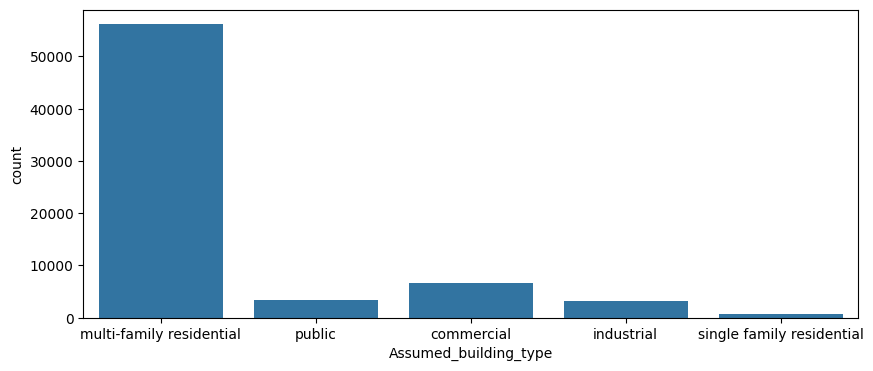

In [22]:
plt.figure(figsize=(10, 4))
sns.countplot(data=beirut, x='Assumed_building_type')
plt.show()

BoxPlot

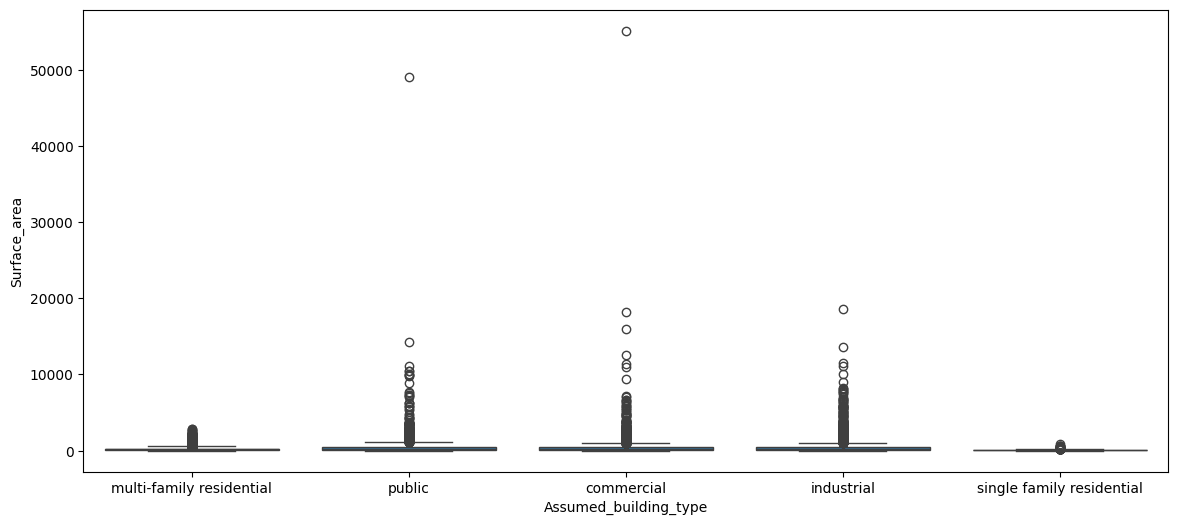

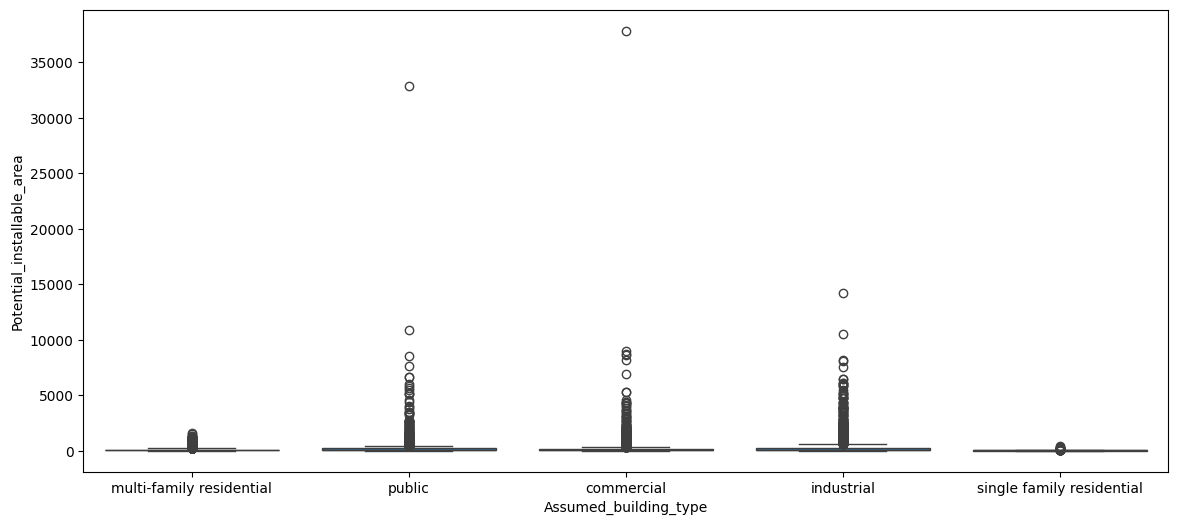

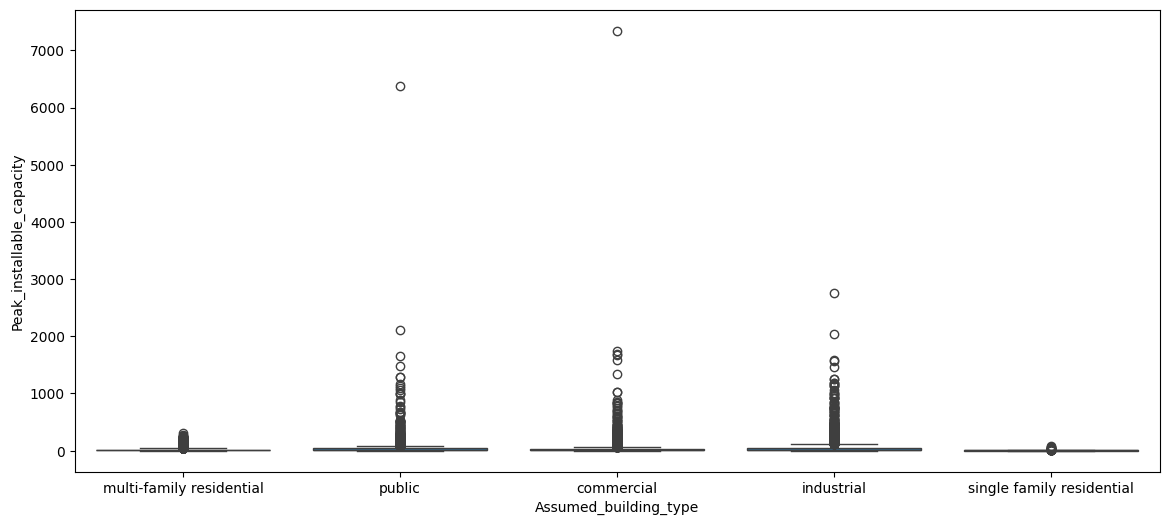

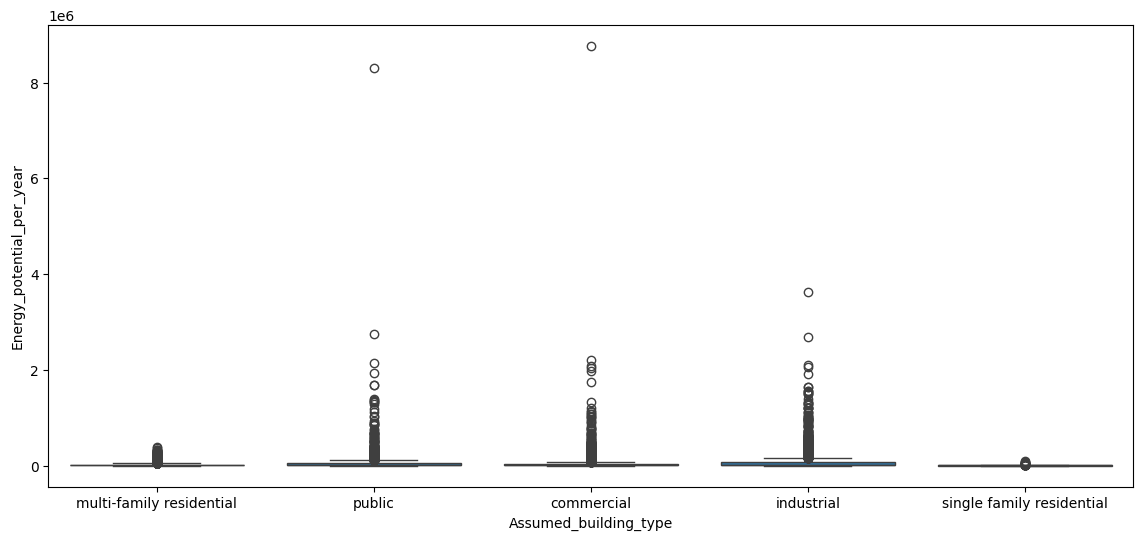

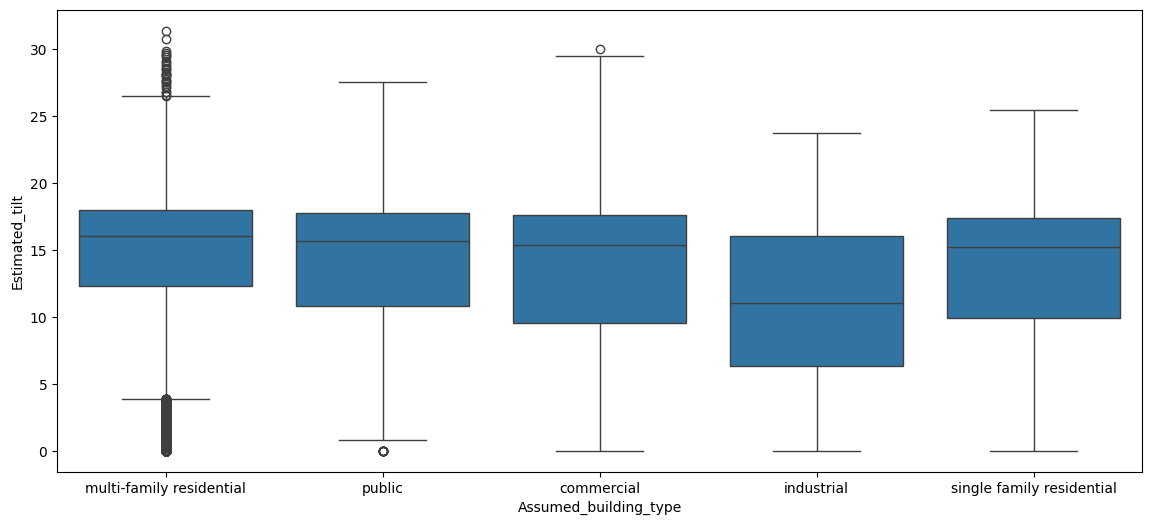

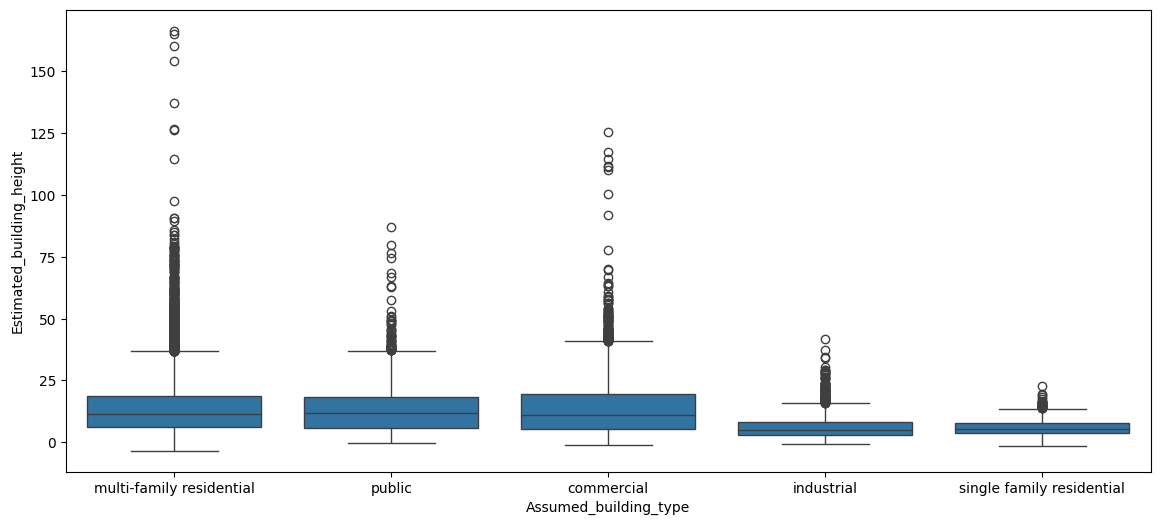

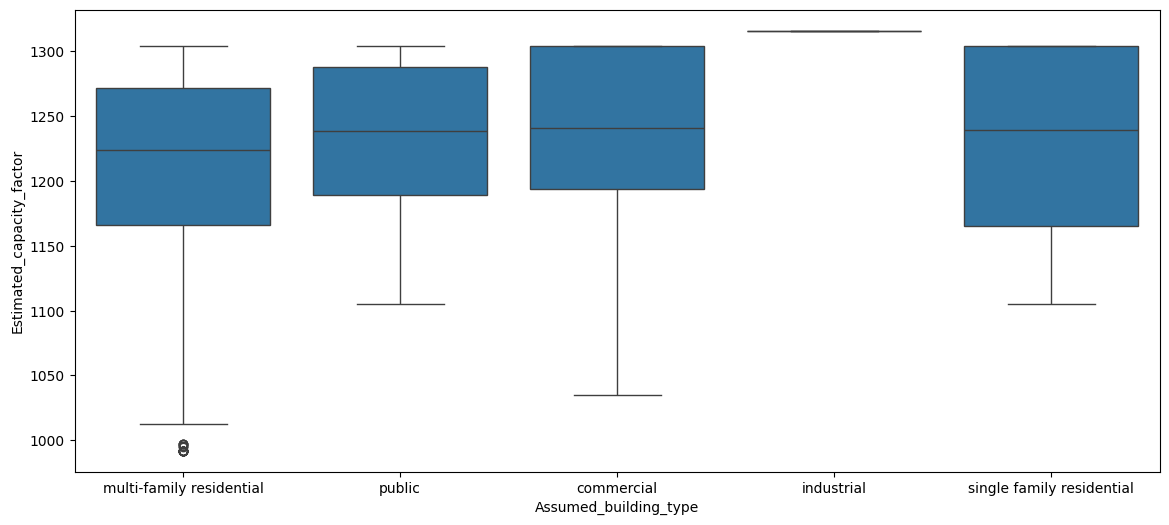

In [23]:
for i in num_col:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x = beirut['Assumed_building_type'], y = beirut[i])
    plt.show()

In [24]:
def outlier_count(col, data = num_col):

    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [25]:
for col in num_col.columns:
    outlier_count(col)


---------------Surface_area---------------

Number of outliers: 4038
Percent of data that is outlier: 5.78%

---------------Potential_installable_area---------------

Number of outliers: 5708
Percent of data that is outlier: 8.17%

---------------Peak_installable_capacity---------------

Number of outliers: 5712
Percent of data that is outlier: 8.18%

---------------Energy_potential_per_year---------------

Number of outliers: 5757
Percent of data that is outlier: 8.24%

---------------Estimated_tilt---------------

Number of outliers: 1186
Percent of data that is outlier: 1.7%


Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
beirut['Assumed_building_type'] = le.fit_transform(beirut['Assumed_building_type'])

In [27]:
beirut['Assumed_building_type'].unique()

array([2, 3, 0, 1, 4])

In [28]:
le.classes_

array(['commercial', 'industrial', 'multi-family residential', 'public',
       'single family residential'], dtype=object)

In [29]:
beirut.head(3)

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,354.39,59.22,11.49,14168.68,2,19.79,33.70,1233.23
1,22.93,8.84,1.71,2232.89,2,7.73,0.18,1304.00
2,53.63,2.67,0.52,517.26,2,24.54,19.88,997.00


<Axes: >

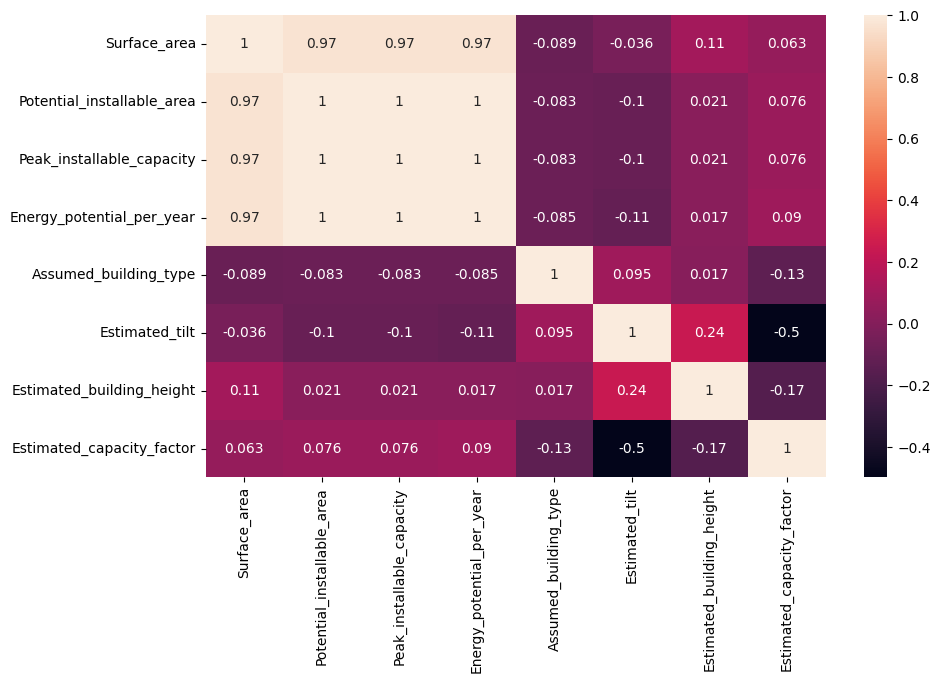

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(beirut.corr(), annot=True)